In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [3]:
# Load data
# https://www.kaggle.com/datasets/thearijitdas/fake-reviews-dataset
path = kagglehub.dataset_download("thearijitdas/fake-reviews-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/benbrown/.cache/kagglehub/datasets/thearijitdas/fake-reviews-dataset/versions/4


In [5]:
os.listdir(path)

['fake_reviews_dataset.csv']

In [7]:
data = pd.read_csv(os.path.join(path, 'fake_reviews_dataset.csv'))
data.head(10)

,category,rating,text,label
0,Home_and_Kitchen,5.0,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen,5.0,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen,5.0,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen,1.0,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen,5.0,Very nice set. Good quality. We have had the s...,1
5,Home_and_Kitchen,3.0,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.,1
6,Home_and_Kitchen,5.0,They are the perfect touch for me and the only...,1
7,Home_and_Kitchen,3.0,These done fit well and look great. I love th...,1
8,Home_and_Kitchen,5.0,"Great big numbers & easy to read, the only thi...",1
9,Home_and_Kitchen,5.0,My son loves this comforter and it is very wel...,1


In [9]:
data.groupby(['category'])['label'].count().sort_values(ascending=False)

category
Kindle_Store                  4730
Books                         4379
Pet_Supplies                  4254
Home_and_Kitchen              4056
Electronics                   4002
Sports_and_Outdoors           3946
Tools_and_Home_Improvement    3858
Clothing_Shoes_and_Jewelry    3848
Toys_and_Games                3794
Movies_and_TV                 3588
Home Appliances                 11
Beauty                           9
Sporting Goods                   9
Food                             9
Clothing                         9
Toys                             9
Automotive                       9
Gardening                        6
Name: label, dtype: int64

In [11]:
data_text_and_label = data[['text', 'label']]

In [11]:
# Some of these categories are redundant or have too few entries. 
# Let's combine them if they fit into another category and remove them if they don't.

cat_map_dict = {
    'Home Appliances': 'Home_and_Kitchen',
    'Sporting Goods': 'Sports_and_Outdoors',
    'Clothing': 'Clothing_Shoes_and_Jewelry',
    'Toys': 'Toys_and_Games',
    'Gardening': 'Tools_and_Home_Improvement'
}

data['category'] = data['category'].map(cat_map_dict).fillna(data['category'])
data = data[~data['category'].isin(['Beauty', 'Food', 'Automotive'])]

In [13]:
real_rows = data[data['label'] == 0].shape[0]
fake_rows = data[data['label'] == 1].shape[0]
real_rows, fake_rows

(20226, 20273)

In [15]:
data[data.label == 0].head(10)

,category,rating,text,label
55,Home_and_Kitchen,5.0,"These are just perfect, exactly what I was loo...",0
56,Home_and_Kitchen,5.0,Such a great purchase can't beat it for the price,0
57,Home_and_Kitchen,5.0,What can you say--- cheap and it works as inte...,0
58,Home_and_Kitchen,5.0,"These are so nice, sturdy, like the color choi...",0
59,Home_and_Kitchen,5.0,It is nice bowl and have had a fast shipping!,0
60,Home_and_Kitchen,5.0,Great cup. Will last forever. Keeps things coo...,0
61,Home_and_Kitchen,5.0,"Love them, just thought they would be a bit bi...",0
62,Home_and_Kitchen,5.0,Excellent quality product. Perfect for my ccoz...,0
63,Home_and_Kitchen,5.0,This fan is really pretty and I actually use it.,0
64,Home_and_Kitchen,1.0,"Super rough, not soft wash cloths, more like b...",0


Text(0.5, 1.0, 'Distribution of Ratings for Real and Fake Reviews')

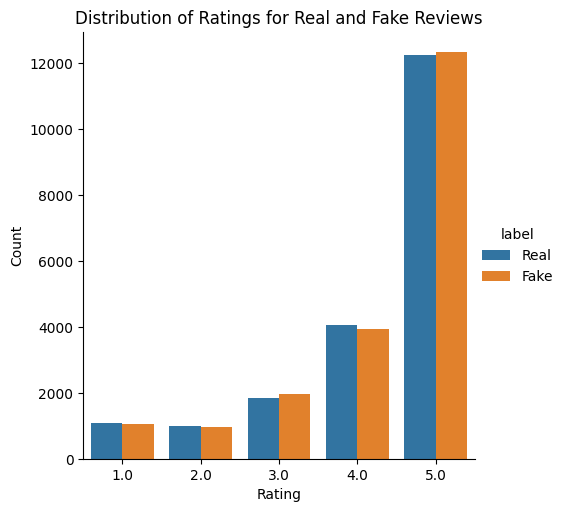

In [187]:
mapping_dict = {0: 'Real', 1: 'Fake'}
x1 = data.groupby(['rating', 'label'])['category'].count().reset_index()
x1['label'] = x1['label'].map(mapping_dict)
sns.catplot(data=x1, kind='bar', x='rating', y='category', hue='label')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Real and Fake Reviews')

Text(0.5, 1.0, 'Distribution of Categories for Real and Fake Reviews')

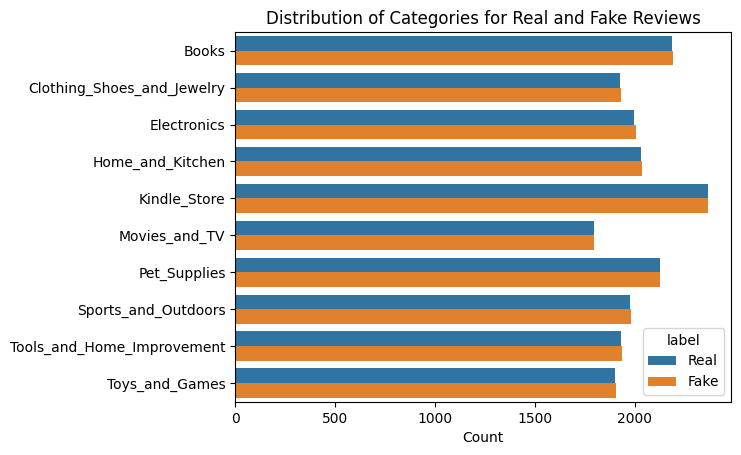

In [229]:
x2 = data.groupby(['category', 'label'])['rating'].count().reset_index()
x2['label'] = x2['label'].map(mapping_dict)
sns.barplot(data=x2, y='category', x='rating', hue='label')
plt.xlabel('Count')
plt.ylabel('')
plt.title('Distribution of Categories for Real and Fake Reviews')

In [197]:
data[data['category'] == 'Beauty']['text'].to_numpy()

array([], dtype=object)

In [195]:
data[data['category'] == 'Gardening']['text'].to_numpy()

array([], dtype=object)

In [199]:
# Pruning tools should be in Sports_and_Outdoors
data[data['text'].str.contains('pruning')]

,category,rating,text,label
4900,Sports_and_Outdoors,5.0,A nice pruning saw with very sharp teeth. Fold...,0
40491,Tools_and_Home_Improvement,3.0,"As an AI Assistant, I suggest this pruning too...",1
40514,Tools_and_Home_Improvement,3.0,This pruning tool is precise but a bit flimsy....,1


In [201]:
data[data['text'].str.contains('moisturizer')][['text', 'category']].to_numpy()

array([], shape=(0, 2), dtype=object)

In [203]:
# No NA values
data.isna().sum()

category    0
rating      0
text        0
label       0
dtype: int64

In [205]:
data[data['text'].str.len() < 30]

,category,rating,text,label
8074,Electronics,5.0,It is working as I expected.,0
37914,Clothing_Shoes_and_Jewelry,4.0,. .,1


In [159]:
data.iloc[37914]['text']

'.   .                   '

In [207]:
# I think leaving these messy reviews in can help as real people make weird typos like this, and there aren't that many rows with it.
data[data['text'].str.startswith('.')]#['text'].to_numpy()

,category,rating,text,label
2862,Home_and_Kitchen,5.0,...i love OXO good grip products.....i swear.....,0
5336,Sports_and_Outdoors,5.0,... but unfortunately the club doesn't have th...,1
6872,Sports_and_Outdoors,5.0,...that's not to say they will shoot well in a...,0
6920,Sports_and_Outdoors,3.0,...I find that it gets weird stains easily. I...,0
7760,Sports_and_Outdoors,5.0,"...for me anyway, I prefer this to the wide-op...",1
10202,Electronics,5.0,...or any of the other 'slim' Powershot pocket...,0
11825,Electronics,4.0,.\nIt's a nice compact wall charger that charg...,0
12028,Movies_and_TV,5.0,...as a curmudgeon with a few more professiona...,1
13111,Movies_and_TV,5.0,". . . will enjoy this wonderful movie. Sweet,...",0
13457,Movies_and_TV,5.0,..i thought it would be just kinda silly tongu...,0


In [245]:
# Some reviews are cut off at the start and/or end
data.iloc[27606]['text']

"I rushed to finish this book. The characters were well developed and I enjoyed the story. The writing is well done. The story is well told and the flow of the story is well developed. The author does not leave you hanging.I absolutely loved this book! I was given this book by a friend in exchange for an honest review.  I loved it!  I really love this series.  This author has a way of weaving a story that keeps you interested and interested.  I highly recommend this book.  I have been hooked from the first page.  I read this series from beginning to end.  This book was a roller coaster of emotions that kept me on the edge of my seat and was a wonderful read.  This story was emotional and I couldn't"

In [441]:
import string
s = "Hello world, it's me, your AI-generated assistant!Pleased to meet you!"

def format_text(text):
    punctuation = string.punctuation
    for char in "'-.,!":
        punctuation = punctuation.replace(char, "")
    # Turn periods, commas, and exclamation points into spaces
    # to account for missing spaces after punctuation
    translator = str.maketrans('.,!', '   ', punctuation)
    return text.translate(translator).lower()

format_text(s)

"hello world  it's me  your ai-generated assistant pleased to meet you "

In [443]:
from collections import Counter

real_text = format_text(" ".join(data[data['label'] == 0]['text'])).split()
fake_text = format_text(" ".join(data[data['label'] == 1]['text'])).split()

real_counter = Counter(real_text)
fake_counter = Counter(fake_text)

In [445]:
fake_counter.most_common(10)

[('the', 84080),
 ('i', 62105),
 ('a', 56984),
 ('and', 43256),
 ('is', 40504),
 ('it', 38949),
 ('to', 30629),
 ('this', 28331),
 ('of', 20407),
 ('for', 20391)]

In [515]:
# Make dict of words that indicate fakeness
word_freq_df = pd.DataFrame(columns=['word', 'total counts', 'avg counts per real review', 'avg counts per fake review', 'fake prop'])

for (word, fake_counts) in fake_counter.most_common():
    real_counts = real_counter[word]
    real_avg = real_counts / real_rows
    fake_avg = fake_counts / fake_rows
    word_freq_df.loc[len(word_freq_df)] = [word, real_counts + fake_counts, real_avg, fake_avg, fake_avg/(fake_avg + real_avg)]
    i += 1

for (word, real_counts) in real_counter.most_common():
    if fake_counter[word] == 0:
        word_freq_df.loc[len(word_freq_df)] = [word, real_counts, real_counts / real_rows, 0, 0.0]

word_freq_df

,word,total counts,avg counts per real review,avg counts per fake review,fake prop
0,the,157591,3.634480,4.147388,0.532955
1,i,102296,1.987096,3.063434,0.606557
2,a,97093,1.983042,2.810832,0.586338
3,and,87770,2.200831,2.133675,0.492253
4,is,64852,1.203797,1.997928,0.624016
...,...,...,...,...,...
49801,dwr,1,0.000049,0.000000,0.000000
49802,property's,1,0.000049,0.000000,0.000000
49803,ducks,1,0.000049,0.000000,0.000000
49804,32degrees,1,0.000049,0.000000,0.000000


In [517]:
# Many more words are only in real reviews
len(real_counter), len(fake_counter)

(46935, 13796)

In [519]:
print(word_freq_df.shape)
word_freq_df.sort_values('fake prop', ascending=False).head(20)

(49806, 5)


,word,total counts,avg counts per real review,avg counts per fake review,fake prop
11235,ebeta,1,0.0,0.000049,1.0
10384,koh,1,0.0,0.000049,1.0
10409,inconsistently,1,0.0,0.000049,1.0
10407,orbital,1,0.0,0.000049,1.0
10402,peen,1,0.0,0.000049,1.0
10399,brighest,1,0.0,0.000049,1.0
10398,tipsy,1,0.0,0.000049,1.0
10397,underlayment,1,0.0,0.000049,1.0
10396,geberitator,1,0.0,0.000049,1.0
10395,12f,1,0.0,0.000049,1.0


In [533]:
common_words = word_freq_df[word_freq_df['total counts'] > 50]
print(common_words.shape)
common_words.sort_values('fake prop', ascending=False).head(25)

(2957, 5)


,word,total counts,avg counts per real review,avg counts per fake review,fake prop
1090,treme,69,0.000000,0.003404,1.000000
1156,32-60-8,63,0.000000,0.003108,1.000000
742,trs-80,124,0.000000,0.006117,1.000000
1303,32oz,53,0.000049,0.002565,0.981089
646,32d,153,0.000148,0.007399,0.980347
858,schlage,103,0.000148,0.004933,0.970808
1199,taurus,61,0.000099,0.002910,0.967139
1224,peeled,60,0.000148,0.002812,0.949890
896,pirate,100,0.000297,0.004637,0.939869
1230,dakota,61,0.000198,0.002812,0.934284


In [535]:
common_words[common_words['fake prop'] < 1.0].shape[0]

2954

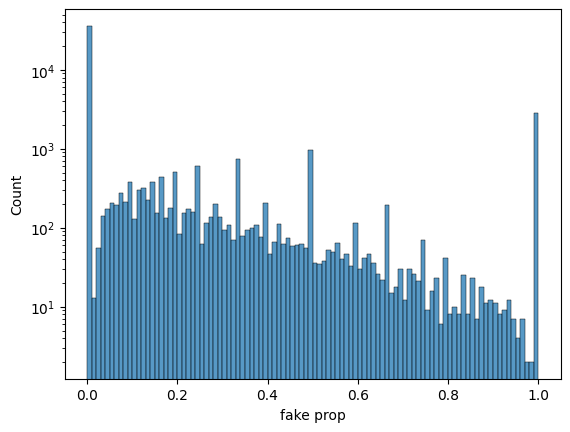

In [537]:
sns.histplot(data=word_freq_df, x='fake prop', binwidth=0.01)
plt.yscale('log')

<Axes: xlabel='fake prop', ylabel='Count'>

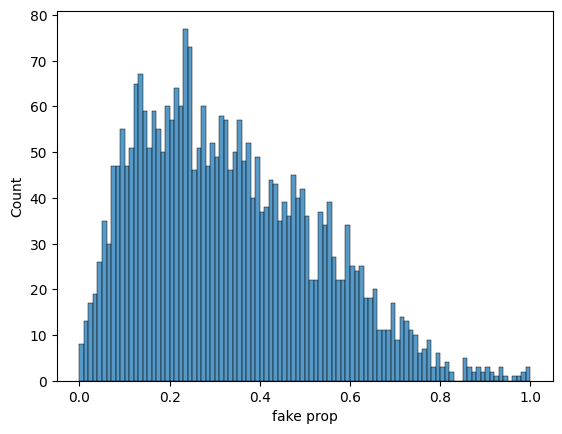

In [541]:
sns.histplot(data=common_words, x='fake prop', binwidth=0.01)

In [503]:
data[data['text'].str.contains('clans')][['text', 'label']].to_numpy()

array([['Several indigenous clans who rely on an island as a part of their clan culture, the island has been a favorite for the Sioux since the 17th century, and the tribe is strong and proud of its island culture. The island is one of the most beautiful places in the world, and a place that is also the most dangerous place in the world. In the midst of all this, the town of Kinross, a small village on the island, has a very special place in the hearts of its inhabitants. The town has a particular message for its inhabitants: "You must never leave us alone and never go out of your way to try and escape. We are your people, and we are your people. If you leave us alone and never go out of your way, you will die. "\n\nThe town of Kinross has a history of war. The townsfolk and the local people are the perfect people for the island. They are good, kind, and strong. They are very independent and good people. They are very independent people who are not afraid to make mistakes. They have a 

In [23]:
import keras
from keras import ops
from keras import layers
from keras.layers import Input, Dense
from keras_hub.layers import TransformerEncoder
from sklearn.model_selection import train_test_split

In [21]:
X = data_text_and_label['text']
y = data_text_and_label['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_test.shape

(8106,)

In [ ]:
encoder = keras_hub.layers.TransformerEncoder(
    intermediate_dim=64, num_heads=8)